# Gaussian Process for Machine Learning 
## Gaussian process simple example

- Implementation of "Seeger, M. (2004). Gaussian processes for machine learning. International journal of neural systems, 14(02), 69-106."
- Implementation from [reference](https://blog.dominodatalab.com/fitting-gaussian-process-models-python/)
- Equations and approaches are cited from "Bishop, C. M. (2006). Pattern recognition and machine learning. springer."

\begin{align*}
k(x_n,x_m) = \theta_0 \exp{\{ -\frac{\theta_1}{2}\|{x_n-x_m}\|^2 \}} + \theta_2 x_n^T x_m + \theta_3 
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

def cov(x, y, thetas):
    return thetas[0] * np.exp( -0.5 * thetas[1] * np.subtract.outer(x, y)**2)

def conditional(x_new, x, y, thetas):
    B = cov(x_new, x, thetas)
    C = cov(x, x, thetas)
    A = cov(x_new, x_new, thetas)

    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

def predict(x, data, kernel, params, sigma, y):
    k = [kernel(x, x2, params) for x2 in data]
    Cinv = np.linalg.inv(sigma)
    y_pred = np.dot(np.dot(k,Cinv),y)
    sigma_new = kernel(x, x, params) - np.dot(k, Cinv).dot(k)
    return y_pred, sigma_new

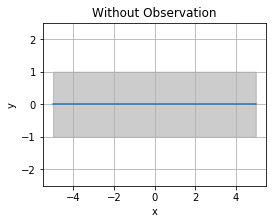

In [2]:
theta = [1, 10]
sigma_0 = cov(0, 0, theta)
xpts = np.arange(-5, 5, step=0.01)

plt.figure(figsize=(4,3))
plt.xlim(-5.5,5.5)
plt.xlabel('x')
plt.ylim(-2.5,2.5)
plt.ylabel('y')
plt.grid(which='both')
plt.plot(xpts, np.zeros(len(xpts)))
plt.fill_between(xpts, np.zeros(len(xpts))-sigma_0, np.zeros(len(xpts))+sigma_0, alpha=0.2, color='k')
plt.title('Without Observation')
plt.savefig('out1.png', transparent=True)

In [3]:
x_pred = np.linspace(-5, 5, 1000)

x = [1]
y = [np.random.normal(scale=sigma_0)]
sigma_1 = cov(x, x, theta)

predictions = [predict(i, x, cov, theta, sigma_1, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)

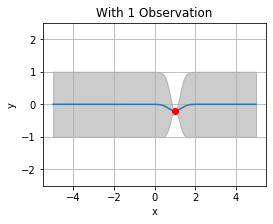

In [4]:
plt.figure(figsize=(4,3))
plt.xlim(-5.5,5.5)
plt.xlabel('x')
plt.ylim(-2.5,2.5)
plt.ylabel('y')
plt.grid(which='both')
plt.plot(x_pred, y_pred)
plt.fill_between(x_pred, y_pred-sigmas, y_pred+sigmas, alpha=0.2, color='k')
plt.plot(x, y, "ro")
plt.title('With 1 Observation')
plt.savefig('out2.png', transparent=True)

In [5]:
x2 = [-0.7]
m, s = conditional(x2, x, y, theta)
y2 = np.random.normal(m, s)

In [6]:
x.append(-0.7)
y.append(y2)
sigma_2 = cov(x, x, theta)

predictions = [predict(i, x, cov, theta, sigma_2, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)

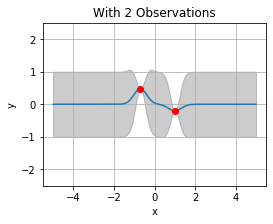

In [7]:
plt.figure(figsize=(4,3))
plt.xlim(-5.5,5.5)
plt.xlabel('x')
plt.ylim(-2.5,2.5)
plt.ylabel('y')
plt.grid(which='both')
plt.plot(x_pred, y_pred)
plt.fill_between(x_pred, y_pred-sigmas, y_pred+sigmas, alpha=0.2, color='k')
plt.plot(x, y, "ro")
plt.title('With 2 Observations')
plt.savefig('out3.png', transparent=True)

In [8]:
x_more = [-4.1, -2.5, 0.0, 1.8, 3.5]
mu, s = conditional(x_more, x, y, theta)
y_more = np.random.multivariate_normal(mu, s)

In [9]:
x += x_more
y += y_more.tolist()
 
sigma_new = cov(x, x, theta)
predictions = [predict(i, x, cov, theta, sigma_new, y) for i in x_pred]
 
y_pred, sigmas = np.transpose(predictions)

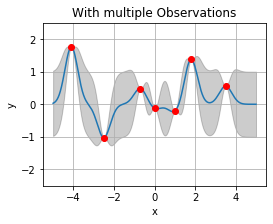

In [10]:
plt.figure(figsize=(4,3))
plt.xlim(-5.5,5.5)
plt.xlabel('x')
plt.ylim(-2.5,2.5)
plt.ylabel('y')
plt.grid(which='both')
plt.plot(x_pred, y_pred)
plt.fill_between(x_pred, y_pred-sigmas, y_pred+sigmas, alpha=0.2, color='k')
plt.plot(x, y, "ro")
plt.title('With multiple Observations')
plt.savefig('out4.png', transparent=True)

### references
- Bishop's Pattern Recognition and Machine Learning: http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf
- Basic code: https://blog.dominodatalab.com/fitting-gaussian-process-models-python/